<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/progetto_classificazione_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [3]:
# load dei dati
# x il target: setosa = 0, versicolor = 2, virginica = 3
data= load_iris(return_X_y=True,as_frame=True)
target=pd.Series(data[1])
features=pd.DataFrame(data[0])
features.columns= features.columns.str.replace(' ','_')
full_data=features.join(target,how='right')
full_data

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)  target
0                  5.1               3.5  ...               0.2       0
1                  4.9               3.0  ...               0.2       0
2                  4.7               3.2  ...               0.2       0
3                  4.6               3.1  ...               0.2       0
4                  5.0               3.6  ...               0.2       0
..                 ...               ...  ...               ...     ...
145                6.7               3.0  ...               2.3       2
146                6.3               2.5  ...               1.9       2
147                6.5               3.0  ...               2.0       2
148                6.2               3.4  ...               2.3       2
149                5.9               3.0  ...               1.8       2

[150 rows x 5 columns]

**EXPLORATORY DATA ANALYSIS**

> Eslporiamo i nostri dati visualizzandoli



In [4]:
full_data.describe()

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

In [5]:
full_data.head()

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

In [6]:
full_data.isnull().sum()

sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width_(cm)     0
target               0
dtype: int64

In [7]:
full_data.groupby('target').size()

target
0    50
1    50
2    50
dtype: int64

In [8]:
train, validation = train_test_split(full_data, test_size = 0.3, random_state = 42)
validation, test = train_test_split(validation, test_size = 0.5, random_state = 42)
print('train shape:',train.shape,'\n validation shape',validation.shape,'\n test shape',test.shape)

train shape: (105, 5) 
 validation shape (22, 5) 
 test shape (23, 5)


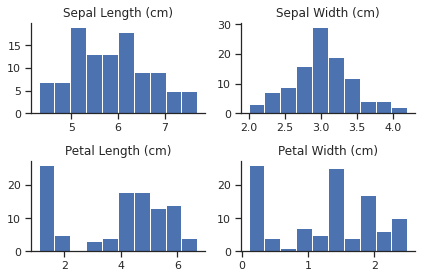

In [9]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length_(cm)'], bins = n_bins);
axs[0,0].set_title('Sepal Length (cm)');
axs[0,1].hist(train['sepal_width_(cm)'], bins = n_bins);
axs[0,1].set_title('Sepal Width (cm)');
axs[1,0].hist(train['petal_length_(cm)'], bins = n_bins);
axs[1,0].set_title('Petal Length (cm)');
axs[1,1].hist(train['petal_width_(cm)'], bins = n_bins);
axs[1,1].set_title('Petal Width (cm)');

#spazio tra i plot
fig.tight_layout(pad=1.0);


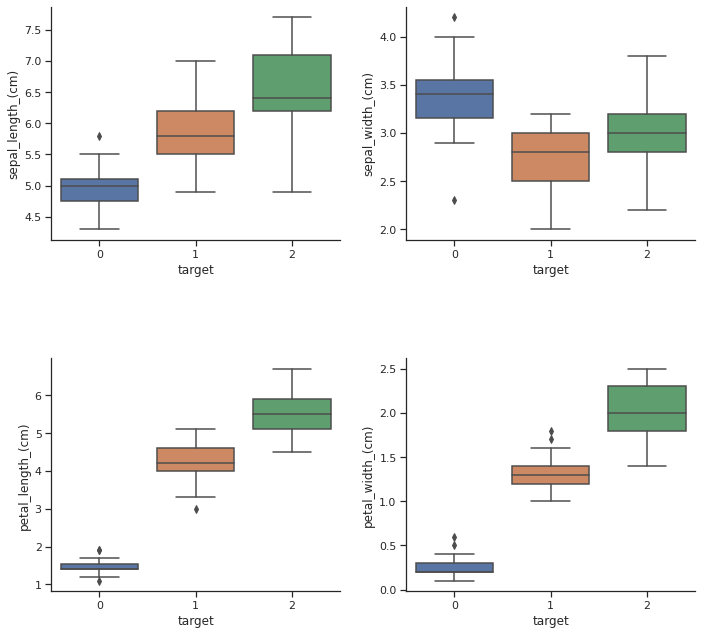

In [10]:
fig, axs = plt.subplots(2, 2)
sns.boxplot(x = 'target', y = 'sepal_length_(cm)', data = train , ax = axs[0,0]);
sns.boxplot(x = 'target', y = 'sepal_width_(cm)', data = train , ax = axs[0,1]);
sns.boxplot(x = 'target', y = 'petal_length_(cm)', data = train , ax = axs[1,0]);
sns.boxplot(x = 'target', y = 'petal_width_(cm)', data = train , ax = axs[1,1]);
#spazio tra i plot
fig.tight_layout(pad=.5)
fig.set_figheight(10)
fig.set_figwidth(10)


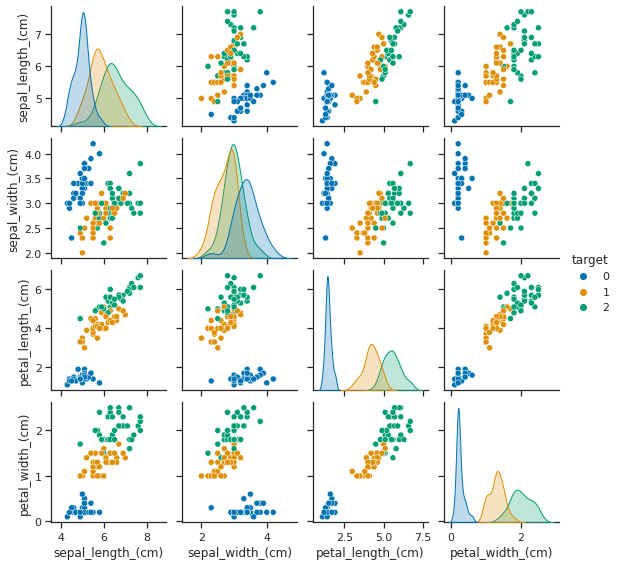

In [11]:
sns.pairplot(train, hue="target", height = 2, palette = 'colorblind')

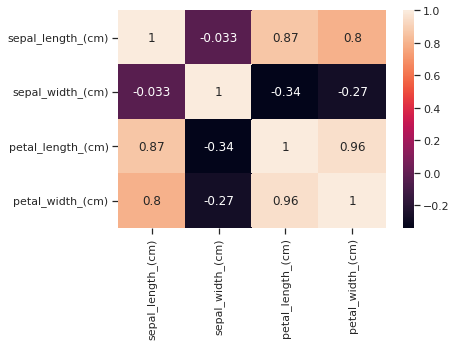

In [12]:
corrmat = train.iloc[:,0:4].corr()
sns.heatmap(corrmat, annot = True)

 **Principal component analisys**

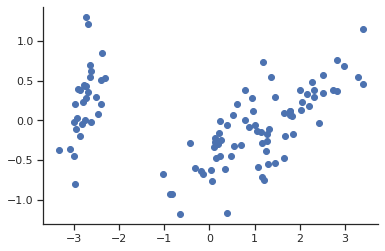

In [13]:
#PCA
X=PCA(n_components=2).fit_transform(train.iloc[:,:4])
PCA1=[]
PCA2=[]
for i in range(np.shape(X)[0]):
  PCA1.append(X[i][0])
  PCA2.append(X[i][1])
plt.scatter(PCA1,PCA2)


Cerchiamo il miglior classificatore 

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [15]:
X_train = train.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_train = train['target']
X_validation = validation.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_validation = validation['target']
X_test = test.loc[:,['sepal_length_(cm)','sepal_width_(cm)','petal_length_(cm)','petal_width_(cm)']]
Y_test = test['target']
train.head()

sepal_length_(cm)  sepal_width_(cm)  ...  petal_width_(cm)  target
81                 5.5               2.4  ...               1.0       1
133                6.3               2.8  ...               1.5       2
137                6.4               3.1  ...               1.8       2
75                 6.6               3.0  ...               1.4       1
109                7.2               3.6  ...               2.5       2

[5 rows x 5 columns]

 **Naive Bayes**

In [16]:
nv_classifier= GaussianNB()
nv_classifier.fit(X_train, Y_train)
sc_val_nb=nv_classifier.score(X_validation,Y_validation)
sc_test_nb=nv_classifier.score(X_test,Y_test)
print('validation score:',sc_val_nb,'\ntest score:',sc_test_nb)

validation score: 1.0 
test score: 0.9565217391304348


**K-Nierest Neighbours**

In [17]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
sc_val_knn=neigh.score(X_validation,Y_validation)
sc_test_knn=neigh.score(X_test,Y_test)
print('validation score:',sc_val_knn,'\ntest score:',sc_test_knn)

validation score: 1.0 
test score: 1.0


**Support Vector Machine**

In [18]:
svc = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm_class = GridSearchCV(svc , parameters)
svm_class.fit(X_train , Y_train)
df=pd.DataFrame(svm_class.cv_results_)
df

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.003527      0.001651  ...        0.035635                1
1       0.002655      0.000338  ...        0.042592                2
2       0.002664      0.000471  ...        0.042592                2
3       0.003613      0.000586  ...        0.030117                2

[4 rows x 15 columns]

**Logistic regression**

In [19]:
log_reg = LogisticRegression(verbose=1)
log_reg.fit(X_train, Y_train)
sc_val_log=log_reg.score(X_validation,Y_validation)
sc_test_log=log_reg.score(X_test,Y_test)
print('validation score:',sc_val_log,'\ntest score:',sc_test_log)

validation score: 1.0 
test score: 1.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [20]:
coef=log_reg.coef_
bias=log_reg.intercept_
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 1,
 'warm_start': False}

In [21]:
prob=log_reg.predict_proba(X_test)
prob
# plt.plot()

array([[9.83082522e-01, 1.69174008e-02, 7.74941765e-08],
       [1.09786602e-04, 1.05539391e-01, 8.94350822e-01],
       [1.25332784e-05, 6.98550124e-02, 9.30132454e-01],
       [9.81770347e-01, 1.82295602e-02, 9.29077385e-08],
       [3.77203298e-04, 2.85378469e-01, 7.14244327e-01],
       [1.18313655e-02, 7.36985314e-01, 2.51183320e-01],
       [1.59550188e-03, 7.51298176e-01, 2.47106322e-01],
       [9.69205465e-01, 3.07944380e-02, 9.66017154e-08],
       [2.42371597e-03, 7.80609245e-01, 2.16967039e-01],
       [6.82524016e-03, 7.73233783e-01, 2.19940977e-01],
       [7.78046828e-02, 9.04139621e-01, 1.80556957e-02],
       [1.76101148e-06, 2.03704188e-02, 9.79627820e-01],
       [6.91013781e-03, 8.90023768e-01, 1.03066094e-01],
       [1.93823536e-05, 4.14600447e-02, 9.58520573e-01],
       [2.76992751e-02, 9.45150797e-01, 2.71499275e-02],
       [9.56059292e-01, 4.39404421e-02, 2.65388636e-07],
       [3.04429829e-03, 7.51701817e-01, 2.45253884e-01],
       [4.76686485e-03, 6.63333

**K-means**

In [22]:
# I_s=[]
# inertia_train=[]
# inertia_test=[]
# for i in range(2):
#   I_s.append(i)
#   kmeans_train=KMeans(n_clusters=i,init='random',algorithm='full')
#   kmeans_train.fit(X_train)
#   kmeans_test=KMeans(n_clusters=i,init='random',algorithm='full')
#   kmeans_test.fit(X_validation)
#   inertia_train.append(kmeans_train.inertia_)
#   inertia_test.append(kmeans_test.inertia_)
# #plot the score relative to the given clusters
# fig, (ax1, ax2) = plt.subplots(2)
# fig.suptitle('SCORES')
# ax1.plot(I_s, inertia_train)
# ax1.set_title('train')
# ax2.plot(I_s, inertia_test)
# ax2.set_title('test')

**Decision Tree**

In [23]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, Y_train)
sc_val_DecTree=DecTree.score(X_validation,Y_validation)
sc_test_DecTree=DecTree.score(X_test,Y_test)
print('validation score:',sc_val_DecTree,'\ntest score:',sc_test_DecTree)

validation score: 1.0 
test score: 1.0


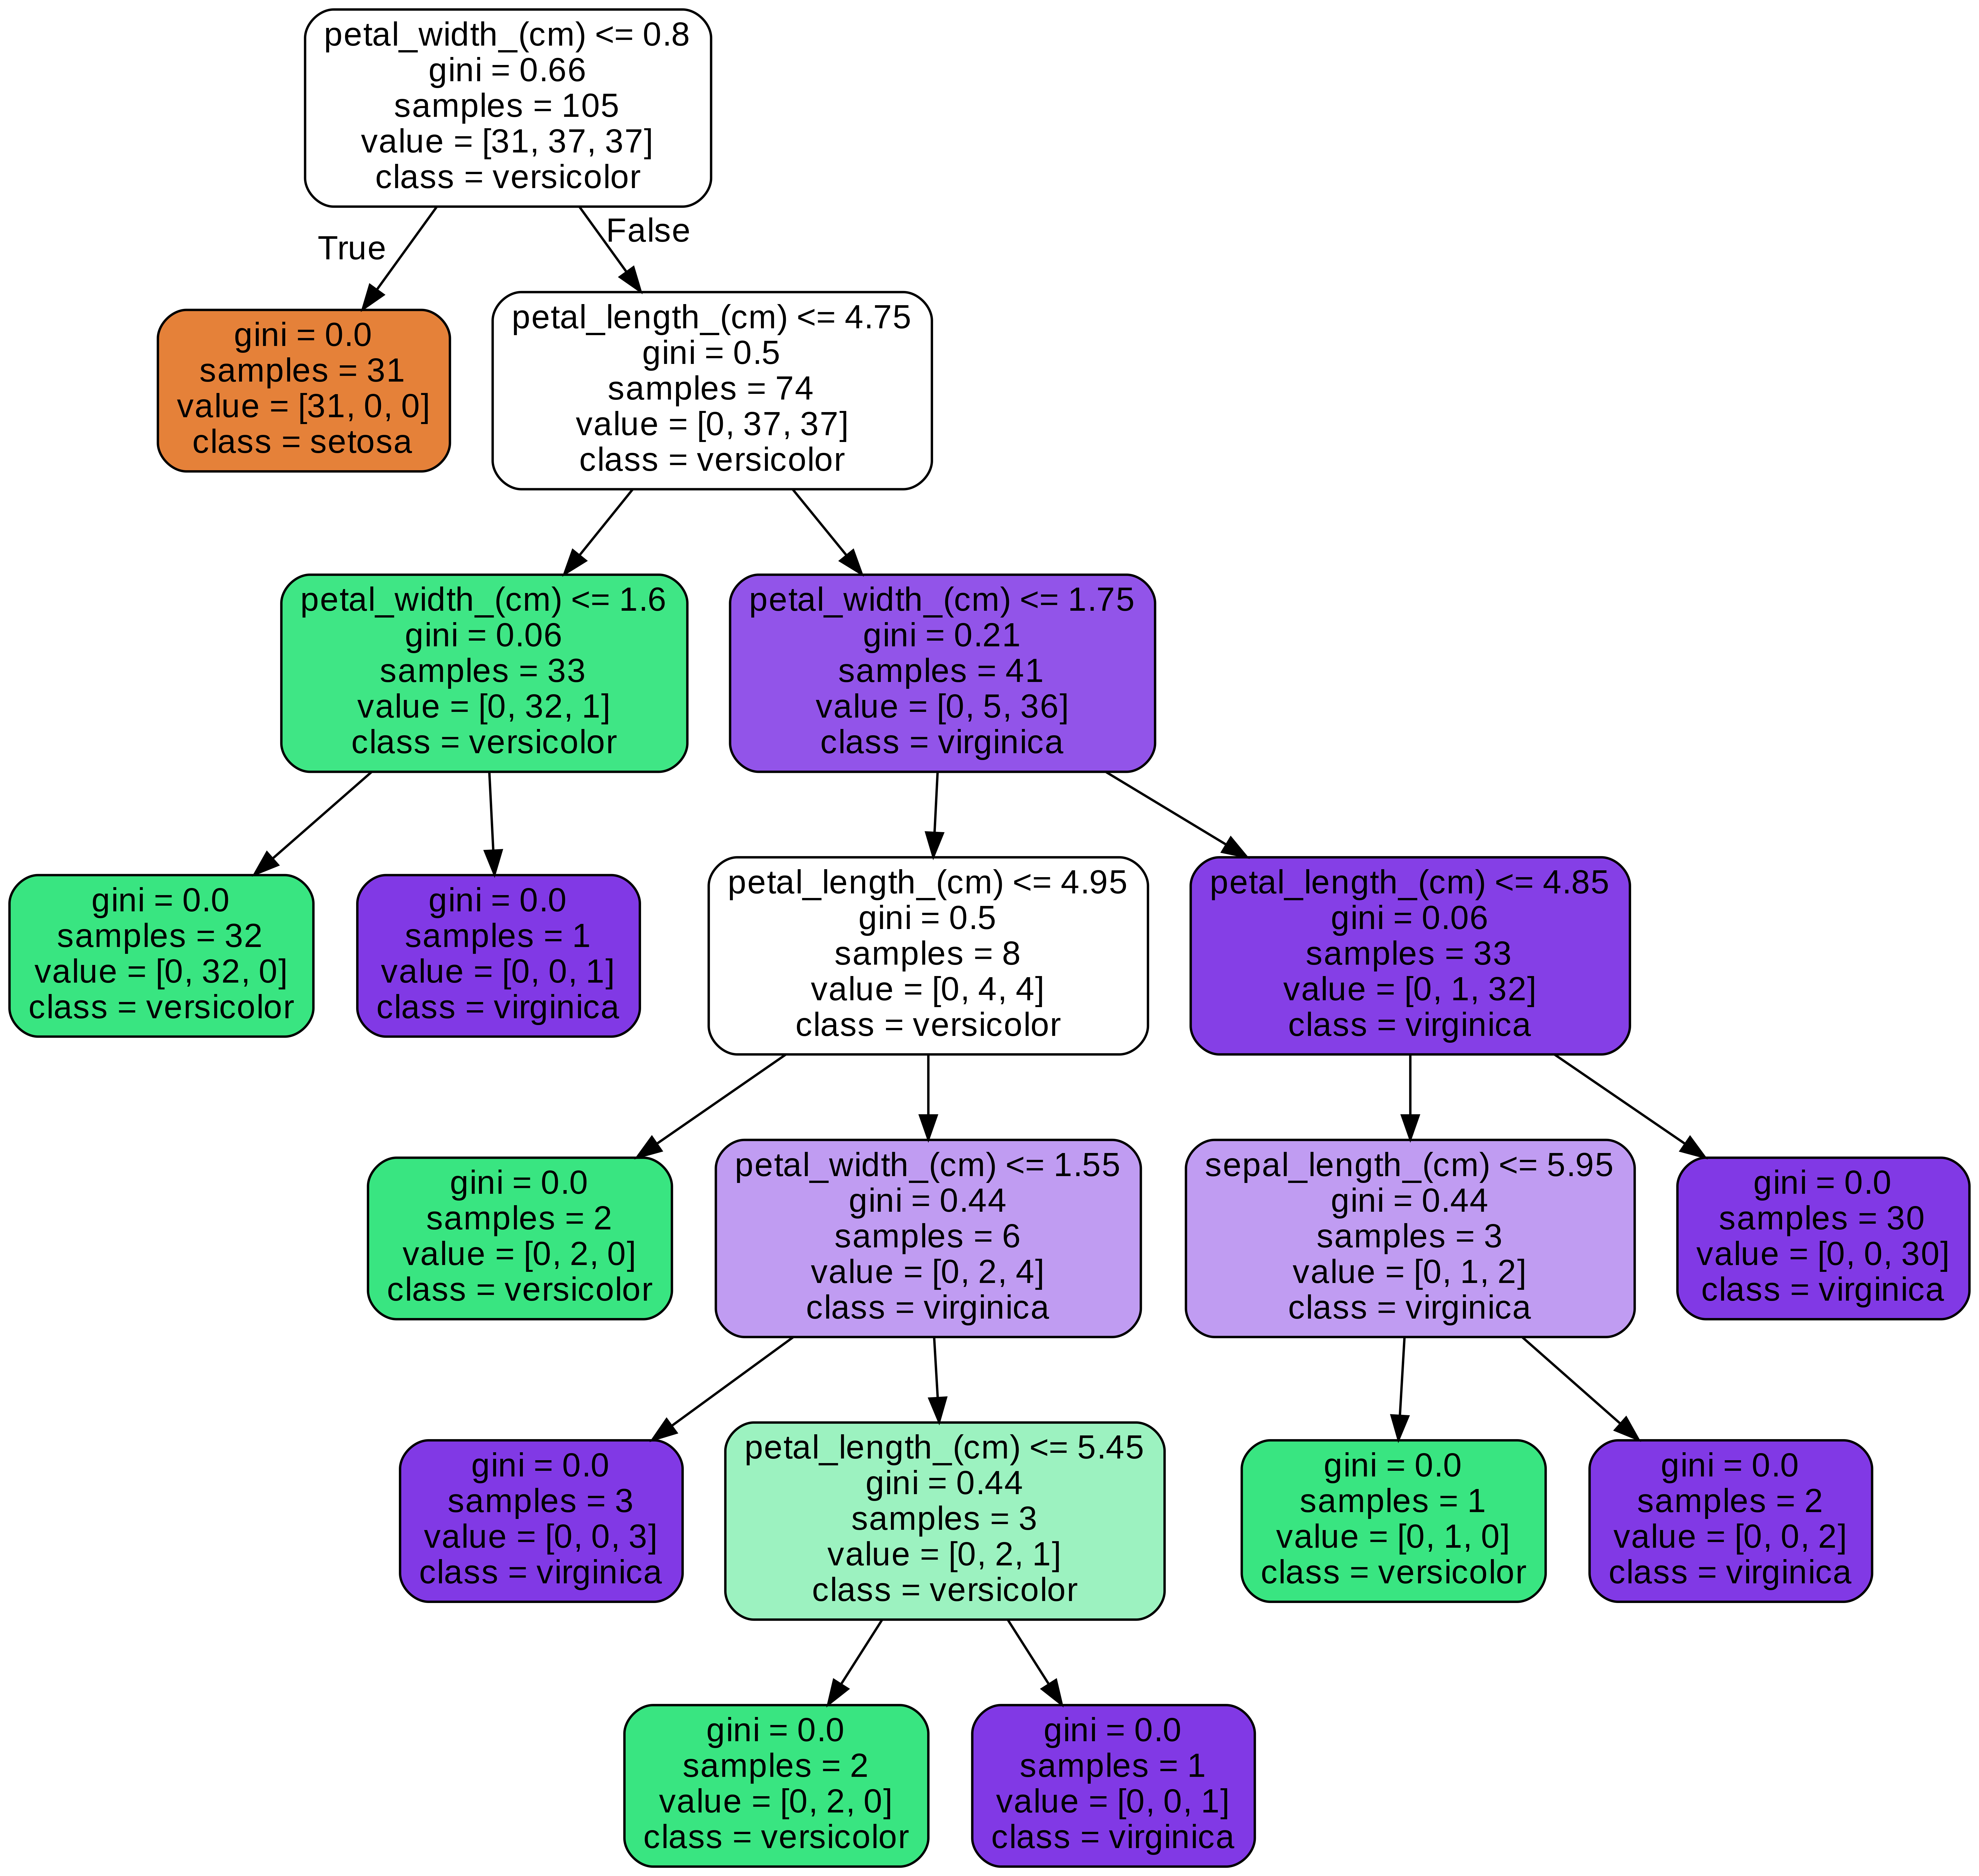

In [24]:
# visualize the decision tree
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(DecTree,
                out_file='DecTree.dot', 
                feature_names = X_train.columns,
                class_names=['setosa','versicolor','virginica'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'DecTree.dot', '-o', 'DecTree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'DecTree.png')

**Random Forest**

In [25]:
random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(X_train, Y_train)
sc_val_ranfor = random_forest.score(X_validation, Y_validation)
sc_test_ranfor = random_forest.score(X_test, Y_test)
print('validation score:' , sc_val_ranfor , '\ntest score:' , sc_test_ranfor)

validation score: 1.0 
test score: 1.0


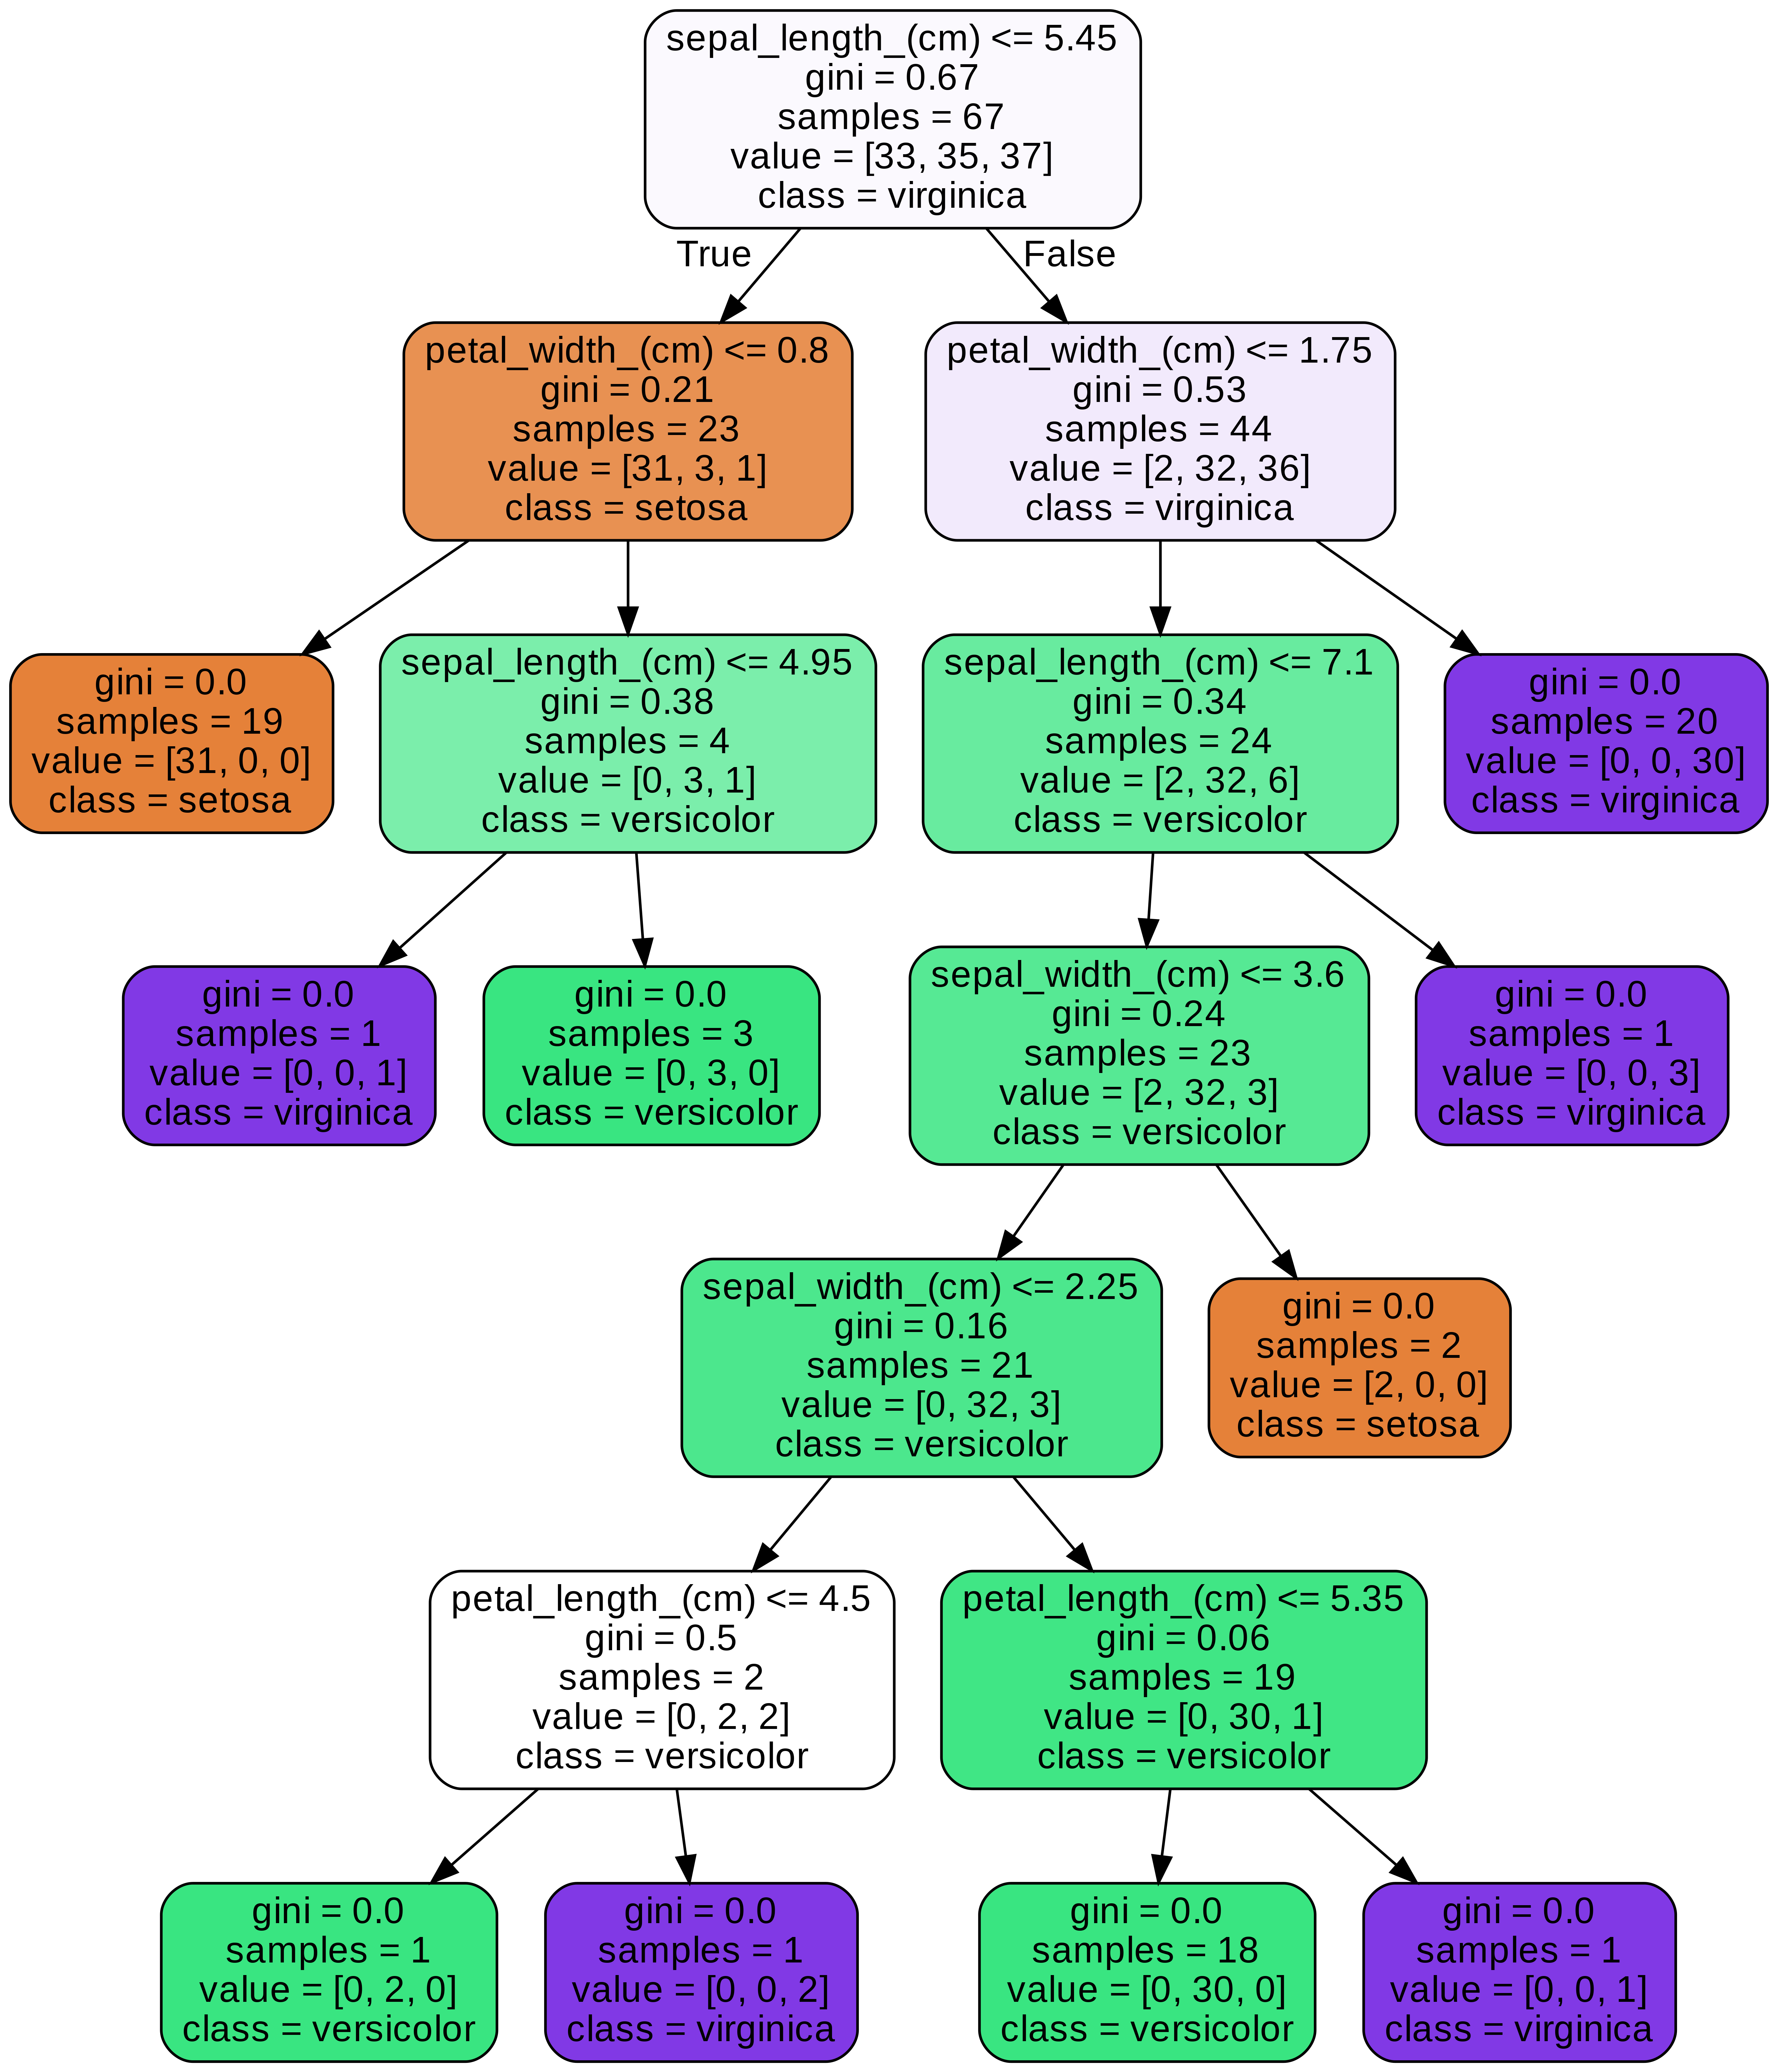

In [26]:
# visualize one tree of the forest
estimator = random_forest.estimators_[0]

# Export as dot file
export_graphviz(estimator, 
                out_file = 'first_tree.dot', 
                feature_names = X_train.columns,
                class_names = ['setosa','versicolor','virginica'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'first_tree.dot', '-o', 'first_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'first_tree.png')

**Artificial Neural Networks**

In [27]:
model = keras.Sequential([
                    layers.Dense(units = 16 , input_dim = 4 , activation = 'relu'),
                    layers.Dense(units=32, activation = 'relu'),
                    layers.Dense(units=3, activation = 'softmax')
                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.to_categorical(Y_train)[0:10]


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [29]:
model.compile( optimizer = 'adam' , loss = 'MeanSquaredError', metrics = ['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 100,restore_best_weights = True)
classifier_ANN_Model = model.fit(X_train , keras.utils.to_categorical(Y_train) , batch_size = 5 , epochs = 100, verbose = 1 ,
                               validation_data = (X_validation , keras.utils.to_categorical(Y_validation)) , callbacks = [early_stopping_cb])

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 0.2814 - accuracy: 0.3524 - val_loss: 0.2184 - val_accuracy: 0.2727
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.3524 - val_loss: 0.1972 - val_accuracy: 0.2727
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.4667 - val_loss: 0.1822 - val_accuracy: 0.7727
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.6095 - val_loss: 0.1758 - val_accuracy: 0.8636
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1657 - accuracy: 0.7238 - val_loss: 0.1469 - val_accuracy: 0.8636
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.6667 - val_loss: 0.1184 - val_accuracy: 0.8636
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.6857 - val_loss: 0.0952 - val_accuracy: 0.8636
Epoch 8/100


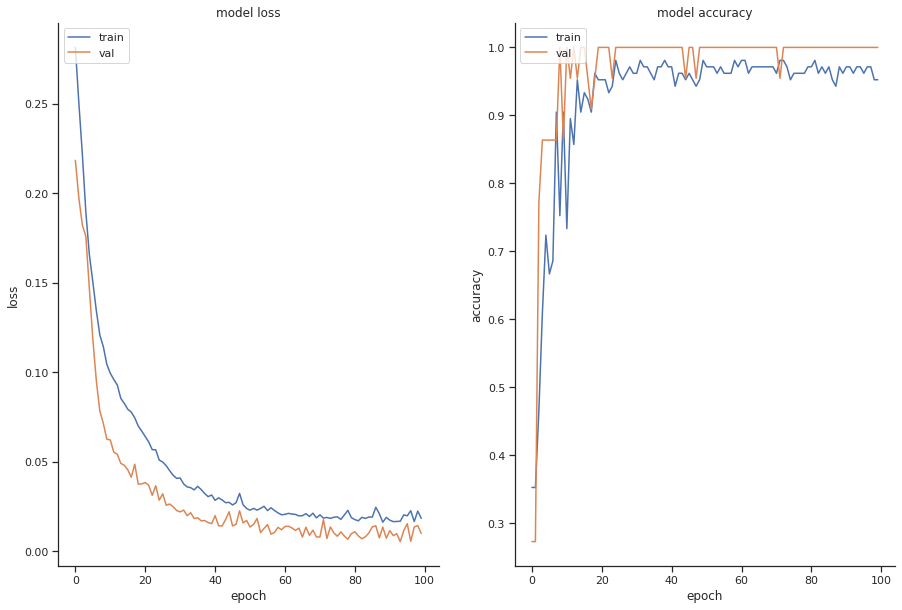

In [30]:
df = pd.DataFrame(classifier_ANN_Model.history)
fig , axes = plt.subplots(1,2)
# first plot
axes[0].plot(df.index , df['loss'] , df['val_loss'])
axes[0].set_title('model loss')
axes[0].set(xlabel = 'epoch' , ylabel = 'loss')
axes[0].legend(['train', 'val'] , loc = 'upper left')
#second plot
axes[1].plot(df.index , df['accuracy'] , df['val_accuracy'])
axes[1].set_title('model accuracy')
axes[1].set(xlabel = 'epoch' , ylabel = 'accuracy')
axes[1].legend(['train', 'val'] , loc = 'upper left')
fig.set_figheight(10)
fig.set_figwidth(15)